In [1]:
from nltk import pos_tag
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation

from data_access.twitter_reader import TwitterReader
from data_storage.db_manager import DBManager
from data_wrangling.wrangler import Wrangler
from data_transformers.normalizers import TextNormalizer 
from data_transformers.vectorizer import OneHotVectorizer
from models.models import KMeansClusters
from visuals.plots import wordcloud
from sklearn.metrics import accuracy_score

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [ ]:
db_manager = DBManager()
db_manager.reset_raw_tweets()
db_manager.reset_processed_tweets()

In [30]:
db_manager = DBManager()

q_dict = {'#': ['trump']}
tr = TwitterReader('./local_configs/api_keys.json')
tr.set_query(q_dict)
result = tr.read(pages=10)

db_manager.save_tweets(result)

page 1...ok
page 2...ok
page 3...ok
page 4...ok
page 5...ok
page 6...ok
page 7...ok
page 8...ok
page 9...ok
page 10...ok
999 tweets read.


In [ ]:
list(db_manager.get_tweet_texts())

In [31]:
wrangler = Wrangler(db_manager.get_tweet_texts())
db_manager.save_processed_tweets(wrangler.tokenize())

In [32]:
processed_tweets = list(db_manager.get_processed_tweets())

In [33]:
tn = TextNormalizer()
transformed_text = tn.transform(processed_tweets)

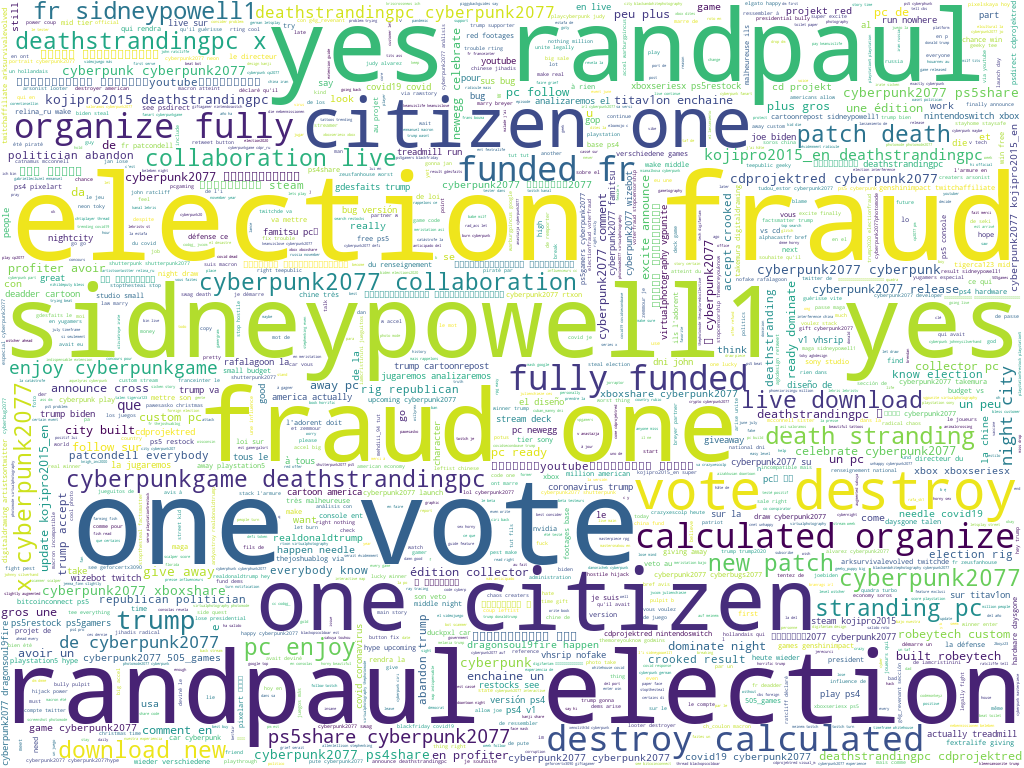

In [34]:
wordcloud(transformed_text)

In [35]:
processed_tweets = list(db_manager.get_processed_tweets())

n_topics = 2
model = Pipeline([
    ('norm', TextNormalizer()),
    ('vect', OneHotVectorizer()),
    ('model', LatentDirichletAllocation(n_components=n_topics)),
])

count_data = model.fit_transform(processed_tweets)

In [36]:
words = model['vect'].vectorizer.get_feature_names()

In [37]:
for topic_idx, topic in enumerate(model['model'].components_):
    print(' '.join([words[i] for i in topic.argsort()[-6:-1]]))

pc live deathstrandingpc cyberpunk trump
citizen yes vote fraud one


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


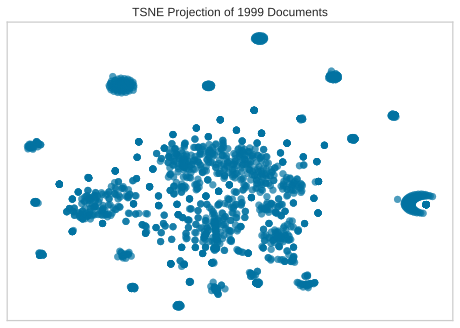

<AxesSubplot:title={'center':'TSNE Projection of 1999 Documents'}>

In [38]:
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

data_text = list(db_manager.get_tweet_texts(text_only=True))


tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(data_text)

tsne = TSNEVisualizer()
tsne.fit(docs)
tsne.poof()

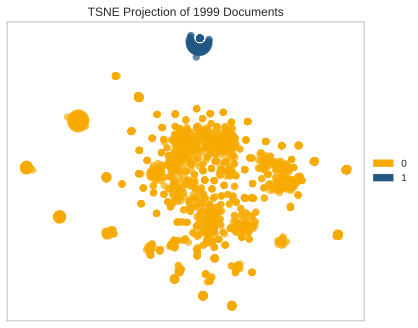

<AxesSubplot:title={'center':'TSNE Projection of 1999 Documents'}>

In [39]:
# Apply clustering instead of class names.
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=2)
clusters.fit(docs)

clustered_docs = zip(data_text, clusters.labels_)

tsne = TSNEVisualizer(colors=[('#f7aa00'),('#235784'),('#40a8c4'),('#bcdbdf'),('#c6fced'),])
tsne.fit(docs, clusters.labels_)
tsne.poof()

In [41]:
l = list(clustered_docs)

In [80]:
f = filter(lambda x: x[1] == 1, l)

In [110]:
next(f)

('RT @SidneyPowell1: Yes @RandPaul \nThe #election was a fraud\nOne citizen - one vote was destroyed by calculated, organized &amp; fully funded fr…',
 1)

In [ ]:
db_manager = DBManager()
vectorizer = OneHotVectorizer()
g = db_manager.get_processed_tweets()

model = Pipeline([
    ('norm', TextNormalizer()),
    ('vect', OneHotVectorizer()),
    ('clusters', KMeansClusters(k=2))
])

clusters = model.fit_transform(g)

In [ ]:
accuracy_score([0]*998, clusters[:998])

In [ ]:
accuracy_score([1]*1000, clusters[998:])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
g = list(db_manager.get_processed_tweets())[998:]

n_topics = 5
model = Pipeline([
    ('norm', TextNormalizer()),
    ('vect', CountVectorizer(
    preprocessor=None, lowercase=False)),
    ('model', LatentDirichletAllocation(n_components=n_topics)),
])

model.fit_transform(g)

In [ ]:
vectorizer = model.named_steps['vect']
model = model.steps[-1][1]
names = vectorizer.get_feature_names()
topics = dict()

for idx, topic in enumerate(model.components_):
    features = topic.argsort()[:-(10 - 1): -1]
    tokens = [names[i] for i in features]
    topics[idx] = tokens

In [ ]:
topics

In [ ]:
ny_tweets = list(db_manager.get_processed_tweets())[998:]

In [ ]:
def find_token(tweet):
    for t in tweet:
        if 'help' in t[0]:
            return True
    return False

In [ ]:
l = list(filter(find_token, ny_tweets))

In [ ]:
l

In [ ]:
len(clusters)